# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.014327e+01     6.533726e+00
 * time: 0.005259990692138672
     1     2.714197e+01     5.086287e+00
 * time: 0.015453815460205078
     2     2.190703e+01     7.672235e+00
 * time: 0.04061698913574219
     3     1.353166e+01     2.721296e+00
 * time: 0.07119393348693848
     4     1.110177e+01     1.066975e+00
 * time: 0.09623289108276367
     5     1.030819e+01     8.352873e-01
 * time: 0.12112689018249512
     6     9.822804e+00     1.037050e+00
 * time: 0.14119601249694824
     7     9.423574e+00     6.926764e-01
 * time: 0.16126489639282227
     8     9.143181e+00     5.314431e-01
 * time: 0.18114686012268066
     9     9.097298e+00     1.158748e+00
 * time: 0.1961979866027832
    10     9.048925e+00     1.426159e+00
 * time: 0.2112870216369629
    11     9.034322e+00     1.403984e+00
 * time: 0.22633886337280273
    12     8.827370e+00     1.014211e+00
 * time: 0.24134087562561035
    13     8.657872e+00     7.973959e-01
 * time:

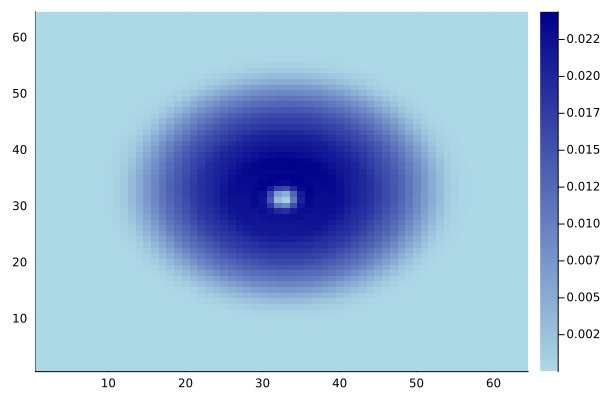

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)